# Pre Masters Maths 6601PMEC

## Week 1 - SymPy Tutorial  
   Based on _"Taming math and physics using SymPy"_ by Ivan Savov and the "SciPy 2017 Tutorial" (https://www.youtube.com/watch?v=5jzIVp6bTy0).
 ### __Introduction to SymPy__

You can use a computer algebra system (CAS) to compute complicated math expressions, solve equations, perform calculus procedures,
and simulate physics systems.  
  
All computer algebra systems offer essentially the same functionality, so it doesn’t matter which system you use: there are free systems like SymPy, Magma, or Octave, and commercial systems like Maple, MATLAB, and Mathematica. This tutorial is an introduction to SymPy, which is a symbolic computer algebra system written in the programming language Python. In a symbolic CAS, numbers and operations are represented symbolically, so the answers obtained are exact. For example, the number $\sqrt{2}$ is represented in SymPy as the object _Pow(2,1/2)_, whereas in numerical computer algebra systems like Octave, the number $\sqrt{2}$ is represented as the approximation _1.41421356237310 (a float)_. For most purposes the approximation is okay, but sometimes approximations can lead to problems: _float(sqrt(2))*float(sqrt(2)) = 2.00000000000000044 = 2_. Because SymPy uses exact representations, you’ll never run into such problems: _Pow(2,1/2)*Pow(2,1/2)= 2_.  
  
  This tutorial is organized as follows. We’ll begin by introducing the SymPy basics and the bread-and-butter functions used for manipulating expressions and solving equations. Afterward, we’ll discuss the SymPy functions that implement calculus operations like differentiation and integration. We’ll also introduce the functions used to deal with vectors and complex numbers. Later we’ll see how to use vectors and integrals to understand Newtonian mechanics. In the last section, we’ll introduce the linear algebra functions available in SymPy.  
  
  This tutorial presents many explanations as blocks of code. Be sure to try the code examples on your own by typing the commands into SymPy. It’s always important to verify for yourself!  
  
  

### __Fundamentals of Mathematics__  
  
  Let’s begin by learning about the basic SymPy objects and the operations we can carry out on them. We’ll learn the SymPy equivalents of many math verbs like “to solve” (an equation), “to expand” (an expression), “to factor” (a polynomial).  
  
  __Numbers__

In [1]:
from sympy import * #Remember the dangers of using import * with multiple libraries in the same notebook/script

In Python, there are two types of number objects: ints and floats.

In [2]:
3 #int

3

In [3]:
3.0 #float

3.0

Integer objects in Python are a faithful representation of the set of integers $\mathbb{Z}$ = {. . . , −2, −1, 0, 1, 2, . . .}. Floating point numbers are approximate representations of the reals $\mathbb{R}$. Regardless of its absolute size, a floating point number is only accurate to 16 decimals. In Python 2, the command _1/7_ (i.e. an _int_ divided by an _int_) would result in an output of _0_ (an _int_). In Python 3, this operation results in automatic conversion of the output to a floating point number:

In [4]:
1/7

0.14285714285714285

This result is better, but it’s still only an approximation of the exact number $\frac{1}{7}$ ∈ $\mathbb{Q}$, since a float has 16 decimals while the decimal expansion of $\frac{1}{7}$ is infinitely long. To obtain an exact representation of $\frac{1}{7}$ you need to create a SymPy expression. You can sympify any expression using the shortcut function S():

In [5]:
S('1/7')

1/7

Note the input to _S()_ is specified as a text string delimited by quotes for the whole expression. If it is just for an integer number, quotation marks are not required. We could have achieved the same result using _S(1)/7_ since a SymPy object divided by an int is a SymPy object. 

In [6]:
S(1)/7

1/7

Except for the tricky Python division operator, other math operators like addition _+_, subtraction _-_, and multiplication _*_ work as you would
expect. The syntax _**_ is used in Python to denote exponentiation:

In [7]:
2**10 ##Same as S('2^10')

1024

When solving math problems, it’s best to work with SymPy objects, and wait to compute the numeric answer in the end. To obtain a numeric approximation of a SymPy object as a _float_, call its _.evalf()_ method:

In [8]:
pi

pi

In [9]:
pi.evalf()

3.14159265358979

The method _.n()_ is equivalent to _.evalf()_. The global SymPy function _N()_ can also be used to to compute numerical values. You can easily change the number of digits of precision of the approximation. Enter _pi.n(400)_ to obtain an approximation of π to 400 decimals.

In [10]:
pi.n()

3.14159265358979

In [11]:
N(pi)

3.14159265358979

In [12]:
pi.n(400)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609

  __Symbols__  
  
  Python is a civilized language so there’s no need to define variables before assigning values to them. When you write a = 3, you define a
new name a and set it to the value 3. You can now use the name a in subsequent calculations.  
  
  Most interesting SymPy calculations require us to define symbols, which are the SymPy objects for representing variables and unknowns. For your convenience, when _live.sympy.org_ starts, it runs the following command automatically:

In [13]:
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)

SymPy automatically prints symbols with greek letters and subscripts.

In [14]:
alpha = symbols('alpha')
alpha

alpha

In [15]:
x1 = symbols('x_1')
x1

x_1

The commands above define some generic symbols x, y, z, and t, and several other symbols with special properties.  
  
  Note the difference between the following two statements:

In [16]:
x + 2

x + 2

In [17]:
p + 2

NameError: name 'p' is not defined

The name $x$ is defined as a symbol, so SymPy knows that $x + 2$ is an expression; but the variable $p$ is not defined, so SymPy doesn’t know what to make of $p + 2$. To use $p$ in expressions, you must first define it as a symbol:

In [18]:
p = Symbol('p')

or use the following...

In [19]:
p = symbols('p')

In [20]:
p + 2

p + 2

You can define a sequence of variables using the following notation:

In [21]:
a0, a1, a2, a3 = symbols('a0:4')

You can use any name you want for a variable, but it’s best if you avoid the letters _Q, C, O, S, I, N_ and _E_ because they have special uses
in SymPy: _I_ is the unit imaginary number $i = \sqrt{−1}$, _E_ is the base of the natural logarithm, _S()_ is the sympify function, _N()_ is used to
obtain numeric approximations, and _O_ is used for big-O notation.  
  
  The underscore symbol _ is a special variable that contains the result of the last printed value. The variable _ is analogous to the ans button
on certain calculators, and is useful in multi-step calculations:

In [22]:
3 + 3

6

In [23]:
_*2

12

If the expression $$\dfrac{1}{\sqrt{2 \pi \sigma^2}} e^{-\dfrac{(x-\mu)^2}{2 \sigma^2}}$$ is expressed in SymPy, then:
  1.  $\sqrt{\quad}$ is represented by the function _sqrt_
  2.  The number $e$ is represented by the command _exp_

In [24]:
sigma, mu = symbols('sigma mu') #These are the only variables that have not been associated with SymPy symbols
1/(sqrt(2*pi*sigma**2)) * exp(-(x-mu)**2/(2*sigma**2))

sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi)*sqrt(sigma**2))

You'll notice that it did not simplify the $\sqrt{\sigma^2}$ term. That is because that the square root of $\sigma^2$ is not always $\sigma$. This is only true if $\sigma$ is a positive number. But we can force it be redefining $\sigma$ and forcing it to be positive using the argument _positive=True_.

In [25]:
sigma, mu = symbols('sigma mu', positive=True)
1/(sqrt(2*pi*sigma**2)) * exp(-(x-mu)**2/(2*sigma**2))

sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

The _symbols_ SymPy command allows you to create variables but if you want something to depend on another variable, then you need to create a function. Undefined functions are created with _Function()_. Stating which variable is dependant on another (functions) is essential for topics like differential equations.

In [26]:
f = Function('f')(x) #You can force that function to always depend on the variable x
f

f(x)

In [27]:
f = Function('f') #Or you can state which variable the function is dependant on each time
f(x) #dependant on x

f(x)

In [28]:
f(z) #dependant on z

f(z)

  __Expressions__  
  
  You define SymPy expressions by combining symbols with basic math
operations and other functions:

In [29]:
expr = 2*x + 3*x - sin(x) - 3*x + 42
simplify(expr)

2*x - sin(x) + 42

The function simplify can be used on any expression to simplify it. The examples below illustrate other useful SymPy functions that correspond to common mathematical operations on expressions:

In [30]:
factor( x**2 - 2*x - 8 )

(x - 4)*(x + 2)

In [31]:
expand( (x - 4)*(x + 2) )

x**2 - 2*x - 8

In [32]:
a, b = symbols('a b')
collect(x**2 + x*b + a*x + a*b, x)

a*b + x**2 + x*(a + b)

To substitute a given value into an expression, call the _.subs()_ method, passing in a python dictionary object _{ key:val, ... }_ with the symbol–value substitutions you want to make:

In [33]:
expr = sin(x) + cos(y)
expr

sin(x) + cos(y)

In [34]:
expr.subs({x : 1, y : 2})

cos(2) + sin(1)

In [35]:
expr.subs({x : 1, y : 2}).n()

0.425324148260754

Note how we used _.n()_ to obtain the expression’s numeric value.

__Solving Equations__  
  
  The function _solve_ is the main workhorse in SymPy. This incredibly powerful function knows how to solve all kinds of equations. In fact _solve_ can solve pretty much any equation! When high school students learn about this function, they get really angry—why did they spend five years of their life learning to solve various equations by hand, when all along there was this solve thing that could do all the math for them? Don’t worry, learning math is never a waste of time.  
  
  The function _solve_ takes two arguments. Use _solve(expr,var)_ to solve the equation _expr==0_ for the variable _var_. You can rewrite any equation in the form _expr==0_ by moving all the terms to one side of the equation; the solutions to $A(x) = B(x))$ are the same as the solutions to $A(x) − B(x) = 0$.  
  
  For example, to solve the quadratic equation $x^2 + 2x − 8 = 0$, use

In [36]:
solve( x**2 + 2*x - 8, x)

[-4, 2]

In this case the equation has two solutions so _solve_ returns a list. Check that $x = 2$ and $x = −4$ satisfy the equation $x^2 + 2x − 8 = 0$.  
  
  The best part about _solve_ and SymPy is that you can obtain symbolic answers when solving equations. Instead of solving one specific quadratic equation, we can solve all possible equations of the form $ax^2 + bx + c = 0$ using the following steps:

In [37]:
a, b, c = symbols('a b c')
solve( a*x**2 + b*x + c, x)

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]

Here we can force pretty printing for the output of the answers using the following command. Normally, this command would be run at the start of the script/notebook.

In [38]:
init_printing()

If the same command is now rerun with pretty printing implemented...

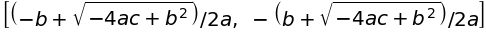

In [39]:
solve( a*x**2 + b*x + c, x)

In this case solve calculated the solution in terms of the symbols $a, b,$ and $c$. You should be able to recognize the expressions in the solution, it’s the quadratic formula $$x_{1,2} = \dfrac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$  
  
  To solve a specific equation like $x^2 + 2x − 8 = 0$, we can substitute the coefficients $a = 1$, $b = 2$, and $c = −8$ into the general solution to obtain the same result:

In [40]:
gen_sol = solve( a*x**2 + b*x + c, x)

In [41]:
[ gen_sol[0].subs({'a':1,'b':2,'c':-8}),
gen_sol[1].subs({'a':1,'b':2,'c':-8}) ]

To solve a system of equations, you can feed _solve_ with the list of equations as the first argument, and specify the list of unknowns you want to solve for as the second argument. For example, to solve for $x$ and $y$ in the system of equations $x + y = 3$ and $3x − 2y = 0$, use

In [42]:
solve([x + y - 3, 3*x - 2*y], [x, y])

The function _solve_ is like a "Swiss Army knife" you can use to solve all kind of problems. Suppose you want to complete the square in the expression $x^2 − 4x + 7$, that is, you want to find constants $h$ and $k$ such that $x^2 − 4x + 7 = (x − h)^2 + k$. There is no special “complete the square” function in SymPy, but you can call solve on the equation $(x − h)^2 + k − (x^2 − 4x + 7) = 0$ to find the unknowns $h$ and $k$:

In [43]:
h, k = symbols('h k')
solve( (x-h)**2 + k - (x**2-4*x+7), [h,k] )

To verify this...

In [44]:
expand( ( (x-h)**2 + k ).subs({h : 2, k : 3}) )

__Rational Functions__  
  
  By default, SymPy will not combine or split rational expressions. You need to use _together_ to symbolically calculate the addition of fractions:

In [45]:
a, b, c, d = symbols('a b c d')
a/b + c/d

In [46]:
together(a/b + c/d)

Alternately, if you have a rational expression and want to divide the numerator by the denominator, use the _apart_ function:

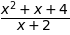

In [47]:
(x**2 + x + 4)/(x + 2)

In [48]:
apart( (x**2 + x + 4)/(x + 2) )

__Polynomials__  
  
  Let’s define a polynomial $P$ with roots at $x = 1, x = 2$, and $x = 3$:

In [49]:
P = (x - 1)*(x - 2)*(x - 3)
P

To see the expanded version of the polynomial, call its _expand_ method:

In [50]:
expand(P)

In [51]:
P.expand()

When the polynomial is expressed in it’s expanded form $P (x) = x^3 − 6 x^2 + 11x − 6$, we can’t immediately identify its roots. This is why the factored form $P (x) = (x − 1)(x − 2)(x − 3)$ is preferable. To factor a polynomial, call its _factor_ method or _simplify_ it:

In [52]:
P.factor() # same as factor(P)

In [53]:
P.simplify() # same as simplify(P)

Recall that the roots of the polynomial $P(x)$ are defined as the solutions to the equation $P(x) = 0$. We can use the solve function to find the roots of the polynomial:

In [54]:
roots = solve(P, x)
roots

Let's check if $P$ equals $(x-1)(x-2)(x-3)$

In [55]:
simplify( P - (x - roots[0])*(x - roots[1])*(x - roots[2]) )

__Equality Checking__  
  
  In the last example, we used the simplify function to check whether two expressions were equal. This way of checking equality works because $P = Q$ if and only if $P − Q = 0$. This is the best way to check if two expressions are equal in SymPy because it attempts all possible simplifications when comparing the expressions. Below is a list of other ways to check whether two quantities are equal with example cases where they fail:

In [56]:
p = (x - 5)*(x + 5)
q = x**2 - 25
p == q

False

In [57]:
p - q == 0

False

In [58]:
simplify(p - q) == 0

True

In [59]:
sin(x)**2 - cos(x)**2 == 1

False

In [60]:
simplify( sin(x)**2 + cos(x)**2 - 1) == 0

True

__Trignometry__ 
  
  The trigonometric functions sin and cos take inputs in radians:

In [61]:
sin(pi/6)

In [62]:
cos(pi/6)

For angles in degrees, you need a conversion factor of $\dfrac{\pi}{180}$:

In [63]:
sin(30 * pi/180)

The inverse trigonometric functions $\sin^{-1}(x) \equiv \arcsin(x)$ and $\cos^{-1}(x) \equiv \arccos(x)$ are used as follows:

In [64]:
asin(S('1')/2)

In [65]:
acos(sqrt(3)/2)

Recall that $\tan(x) = \dfrac{\sin(x)}{\cos(x)}$. The inverse function of $\tan(x)$ is $\tan^{-1}(x) \equiv \arctan(x)$ which is equivalent to the SymPy command _atan(x)_

In [66]:
tan(pi/6)

In [67]:
atan( sqrt(3)/3 )

The function _acos_ returns angles in the range $[0, \pi]$, while _asin_ and _atan_ return angle in the range $\left[- \frac{\pi}{2}, \frac{\pi}{2}\right]$.  
  
  Here are some trignometric identities that SymPy knows:

In [68]:
sin(x) == cos(x - pi/2)

True

In [69]:
simplify( sin(x)*cos(y) + cos(x)*sin(y) )

In [70]:
e = 2*sin(x)**2 + 2*cos(x)**2
trigsimp(e)

In [71]:
trigsimp(log(e))

In [72]:
trigsimp(log(e), deep=True)

In [73]:
simplify( sin(x)**4 - 2*cos(x)**2 * sin(x)**2 + cos(x)**4 )

The function trigsimp does essentially the same job as simplify.  
  
  If instead of simplifying you want to expand a trig expression, you should use _expand_trig_, because the default _expand_ won’t touch trig functions:

In [74]:
expand( sin(2*x) )

In [75]:
expand_trig( sin(2*x) )

---
Dr J T Wharton 

---